## 08데이터 전처리 실습-2
### 상관분석을 통한 중복 속성 제거
#### 2020/06/08 keonwoo Park

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("Ch3-1(유동인구수).csv",encoding='CP949')

In [32]:
data

,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대
0,2010-06-21,12시~13시까지,343099,417482,대전광역시 서구 월평동,2,24,68,50,31,4,37,64,44,26
1,2010-06-21,19시~20시까지,343099,417482,대전광역시 서구 월평동,19,44,28,33,21,14,56,49,43,18
2,2010-06-20,12시~13시까지,343099,417482,대전광역시 서구 월평동,13,33,34,61,55,13,32,29,28,12
3,2010-06-20,19시~20시까지,343099,417482,대전광역시 서구 월평동,23,33,32,547,129,12,39,13,46,4
4,2010-06-21,12시~13시까지,343121,417343,대전광역시 서구 월평동,0,9,27,21,6,5,24,20,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,2010-07-03,19시~20시까지,316493,506876,경기도 오산시 궐동,20,55,60,56,26,22,45,34,25,15
23217,2010-07-07,12시~13시까지,295242,498726,경기도 화성시 장안면,11,17,22,35,40,8,15,33,25,42
23218,2010-07-07,19시~20시까지,295242,498726,경기도 화성시 장안면,25,13,29,23,55,31,17,37,19,45
23219,2010-07-10,12시~13시까지,295242,498726,경기도 화성시 장안면,12,15,35,31,45,10,12,31,25,37


In [33]:
# 상관계수 분석 (남자 20대 vs 여자 20대)

corr = np.corrcoef(data["남자20대"],data["여자20대"])
print("====== 남자 20대 vs 여자 20대 ======")
print(corr)


====== 남자 20대 vs 여자 20대 ======
[[1.         0.84727982]
 [0.84727982 1.        ]]


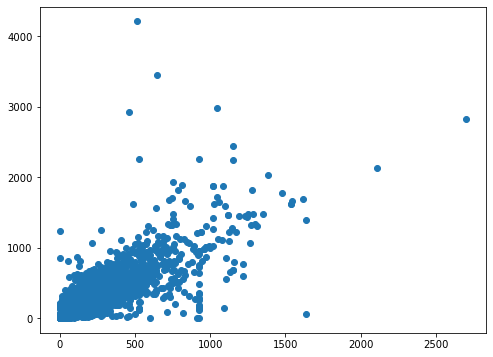

In [34]:
plt.figure(figsize= (8,6))

plt.scatter(data["남자20대"],data["여자20대"])

plt.show()

In [35]:
# 상관계수 분석 남자10대 vs 여자 50대

corr_2 = np.corrcoef(data["남자10대"],data["여자50대"])
print("====== 남자 10대 vs 여자 50대 ======")
print(corr_2)

====== 남자 10대 vs 여자 50대 ======
[[1.         0.26322329]
 [0.26322329 1.        ]]


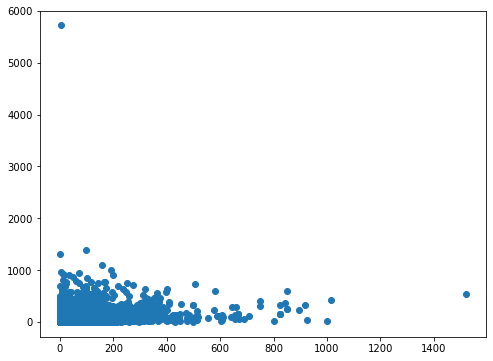

In [37]:
plt.figure(figsize= (8,6))

plt.scatter(data["남자10대"],data["여자50대"])

plt.show()

In [39]:
# 상관계수 분석 남자 30대 vs 여자 30대

corr = np.corrcoef(data["남자30대"],data["여자30대"])
print("===== 남자 30대 vs 여자 30대 ======")
print(corr)

===== 남자 30대 vs 여자 30대 ======
[[1.         0.76546373]
 [0.76546373 1.        ]]


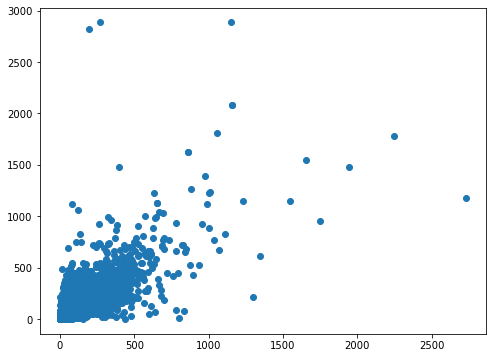

In [41]:
plt.figure(figsize = (8,6))
plt.scatter(data["남자30대"],data["여자30대"])
plt.show()

# 데이터 축소

### 데이터 큐브집계
- 피벗테이블

### 속성 부분집합 선택
- 소모적 탐색법
- 경험적 방법 -> 의사결정트리(엔트로피, 지니계수) - 분류기법

### 차원축소
- 웨이블릿 변환
- 주성분 분석
- 회귀 모형

### 수량축소
- 표본 추출
- 히스토그램
- 군집화

## 속성의 부분집합 선택
- 의사결정 트리

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree


In [95]:
x_data = iris.data[:]
y_data = iris.target[:]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=0)

In [97]:
# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
# 데이터셋 표준화하기
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [99]:
iris_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3 ,random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [100]:
y_pred = iris_tree.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score # 분류정확도

In [102]:
print("정확도: %.2f" % accuracy_score(y_test, y_pred))

정확도: 0.98


In [5]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from pydotplus import graph_from_dot_data
import os
os.environ['PATH'] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

In [132]:
x_list = list(iris.feature_names)
y_list = list(iris.target_names)

In [133]:
dot_data = export_graphviz(iris_tree, out_file=None, feature_names = x_list,
                          class_names=y_list, filled=True, rounded=True, special_characters=True)

In [134]:
graph = graph_from_dot_data(dot_data)
graph.write_png("Tree_1.png")

True

In [136]:
df_graph = pydotplus.graph_from_dot_data(dot_data)

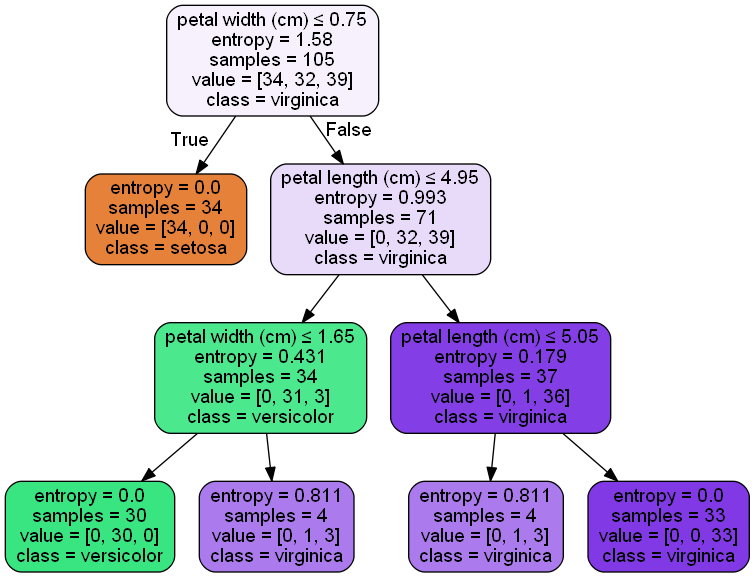

In [137]:
Image(df_graph.create_png())

# 차원축소
 웨이블릿 변환

In [8]:
data = pd.read_csv("ch4-3(대기오염도측정).csv",encoding='CP949')

In [6]:
import pywt # Wavelete Transform을 위한 패키지

In [ ]:
# 대기오염 축정치를 대상으로 웨이블릿 변환 함수 적용

In [16]:
# data를 1차원 배열로 변환
wave_src = []
wave_src.extend(data.loc[:,"SO2"])
wave_src.extend(data.loc[:,"NO2"])
wave_src.extend(data.loc[:,"CO"])
wave_src.extend(data.loc[:,"O3"])
wave_src.extend(data.loc[:,"PM10"])

In [17]:
coeffs = pywt.wavedec(wave_src, 'db1', mode = 'periodic',level=12)

In [19]:
coeffs_len = len(coeffs)

In [25]:
# detail coefficient 출력 (레벨 12부터 1까지)
for i in range(1, coeffs_len):
    print("Detail coeffcient (level = "+ str(coeffs_len-i)+")")
    print(coeffs[i])

Detail coeffcient (level = 12)
[ 1.08906250e-02 -2.95890625e-01  2.56406250e-01 -1.09967344e+01
 -1.65625000e-01  1.03323750e+01  9.10937500e-03 -1.89281527e+03
  7.27609375e+02  9.71584188e+02]
Detail coeffcient (level = 11)
[-2.24506403e-02  8.50737846e-03 -4.92765038e-03 -3.84621895e-01
 -7.84888527e-02  1.43056541e-01 -1.39056968e-01 -1.27817948e+01
  3.36096692e+00 -1.75229899e+00 -4.56304845e+00  5.79456330e+00
 -3.23081508e-01  2.02232539e-01 -1.94825574e+02 -6.03162084e+02
  6.28441152e+01  1.76975569e+02  5.94463566e+02]
Detail coeffcient (level = 10)
[ 2.97187500e-02 -7.03125000e-03  1.32812500e-02  3.97500000e-02
  1.71875000e-03  3.37500000e-03 -1.53750000e-02 -4.64750000e-01
 -1.24875000e-01 -3.10625000e-02 -1.59375000e-02  6.37500000e-03
 -2.02812500e-02 -6.30000000e-02 -1.43368750e+00  4.89375000e+00
  3.00625000e+00  1.75937500e+00  1.87500000e-01  1.92812500e+00
 -2.05312500e+00 -2.67500000e+00  8.46031250e+00 -5.90625000e-02
 -4.41875000e-02 -1.13406250e-01  1.9281250

Source data graph : 


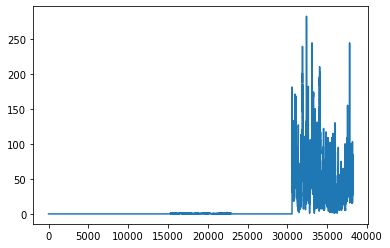

In [27]:
# 원래의 전체적인 신호
print("Source data graph : ")
plt.plot(wave_src)
plt.show()

Approximation coefficient graph : 


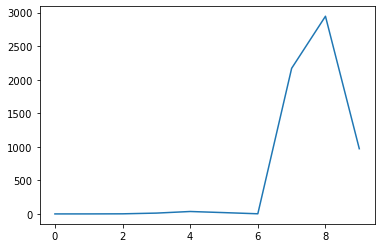

In [28]:
# Approximation coefficient 시각화(level 12)
print("Approximation coefficient graph : ")
plt.plot(coeffs[0])
plt.show()

Detail coeffcient graph(level = 12)


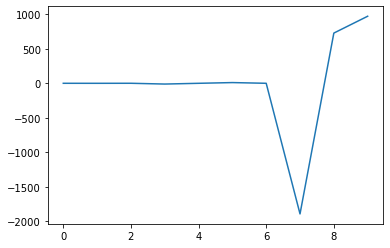

Detail coeffcient graph(level = 11)


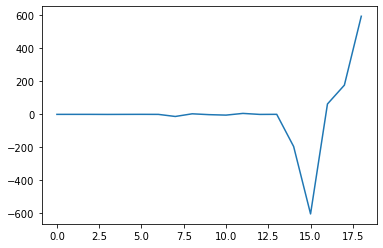

Detail coeffcient graph(level = 10)


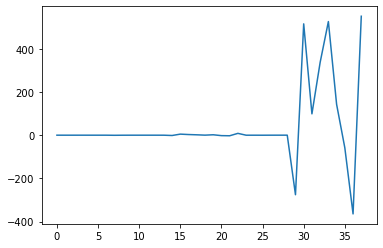

Detail coeffcient graph(level = 9)


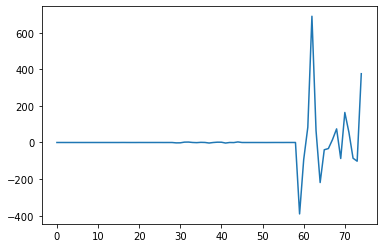

Detail coeffcient graph(level = 8)


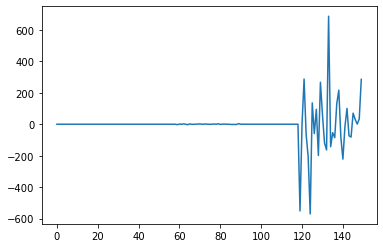

Detail coeffcient graph(level = 7)


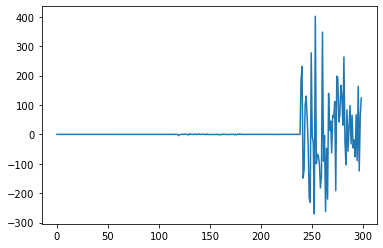

Detail coeffcient graph(level = 6)


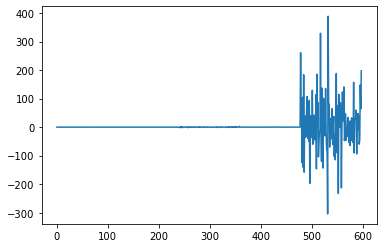

Detail coeffcient graph(level = 5)


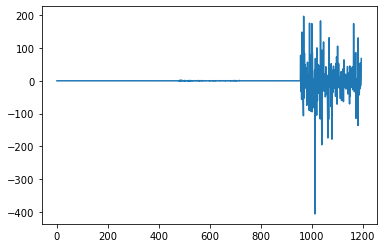

Detail coeffcient graph(level = 4)


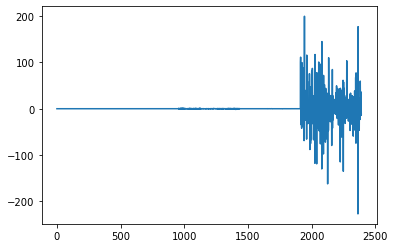

Detail coeffcient graph(level = 3)


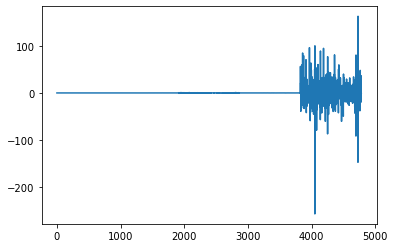

Detail coeffcient graph(level = 2)


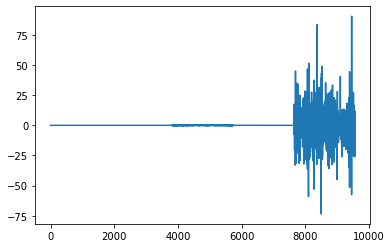

Detail coeffcient graph(level = 1)


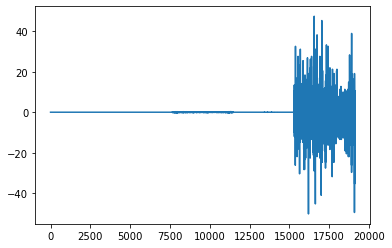

In [29]:
# detail coefficient 출력 (레벨 12부터 1까지)
for i in range(1, coeffs_len):
    print("Detail coeffcient graph(level = "+ str(coeffs_len-i)+")")
    plt.plot(coeffs[i])
    plt.show()